In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage.io as io
from PIL import Image

please enter your path of colorphoto.jpg


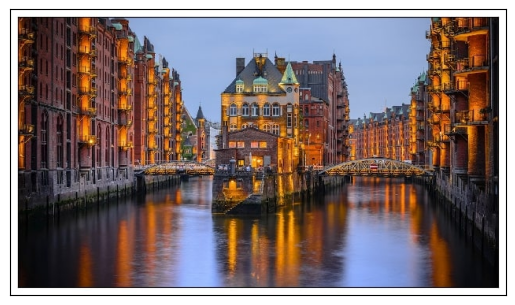

In [2]:
plt.figure(figsize = (6.4,4.8))
img = input("please enter your path of color")
image = io.imread(img)
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(image)

In [3]:
image.shape
x = int(image.shape[0])
y = int(image.shape[1])
z = int(image.shape[2])

In [4]:
data = image /255.0 # now data is between 0 and 1
data = data.reshape(x*y, z) # making data's shape eqaual to image.shape
data.shape

(228690, 3)

In [5]:
def plot_pixels(data, title, colors = None, N = 10000):
  if colors is None:
    colors = data

  rnd = np.random.RandomState(0) # creates an empty numpy array which size is zero.
  i = rnd.permutation(data.shape[0])[:N] # choose a random subset
  colors = colors[i] # non empty colors are eqauls to its subsets
  R, G,B = data[i].T # assigns colors red,green and blue colors to this variable seperately of random subsets

  figure ,ax = plt.subplots(1, 2, figsize=(12,4))
  #Red-Green and Red-Blue color combinations are shown as seperate graphics
  ax[0].scatter(R,G, color = colors, marker = '.')
  ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0,1))

  ax[1].scatter(R , B, color = colors, marker= '.')
  ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0,1), ylim = (0,1))

  figure.suptitle(title, size = 15)

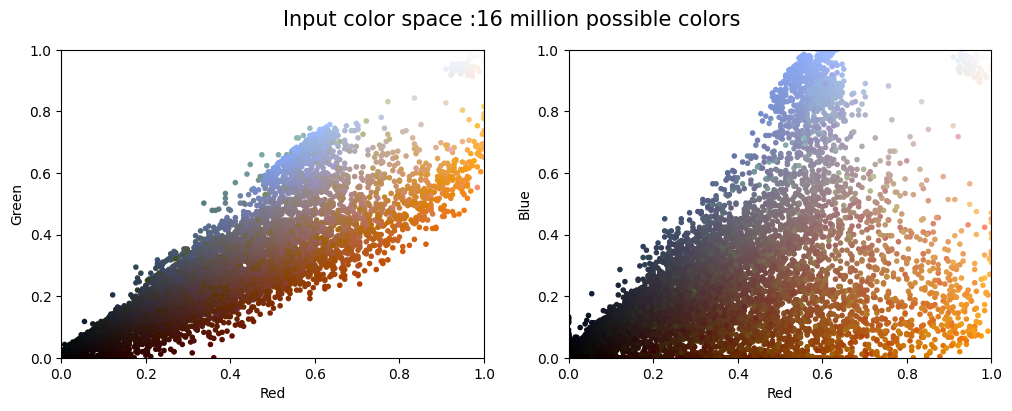

In [6]:
plot_pixels(data, title ='Input color space :16 million possible colors')

How many colours should consist from new image?3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


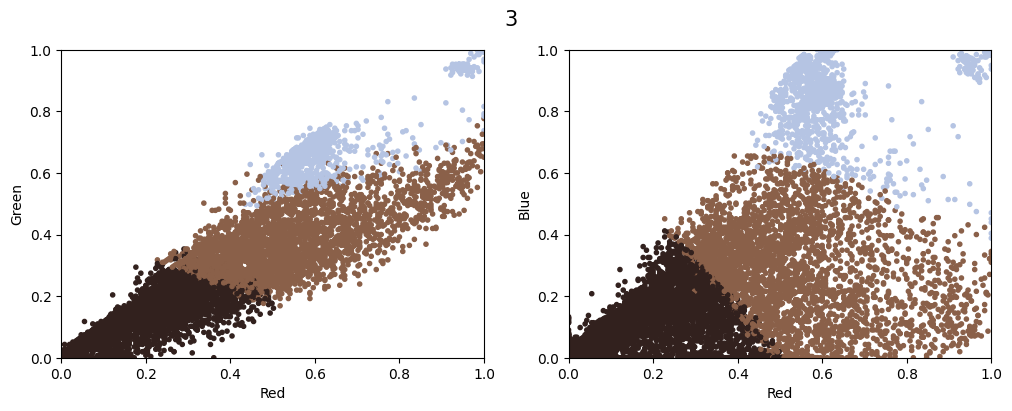

In [7]:
from sklearn.cluster import MiniBatchKMeans
minibatch = int(input("How many colours should consist from new image?"))
kmeans = MiniBatchKMeans(minibatch) # divides 16 different color subsets
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)] # for each data point, it is determined by kmeans algorithm which cluster center is closest. After it creates new color for every data point.
plot_pixels(data, title = str(minibatch) + 'colors' , colors= new_colors )

Text(0.5, 1.0, '3color image')

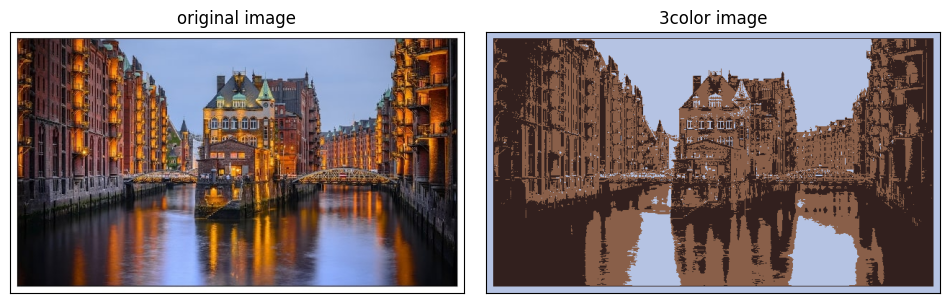

In [8]:
image_recolored = new_colors.reshape(image.shape)
figure, ax = plt.subplots(1,2, figsize = (12, 4),
                          subplot_kw=dict(xticks=[], yticks=[])) # creates two different plot which original image and color image.
figure.subplots_adjust(wspace = 0.05)
ax[0].imshow(image)
ax[0].set_title('original image', size = 12)
ax[1].imshow(image_recolored)
ax[1].set_title(str(minibatch) + ' color image' ,size = 12)